In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans


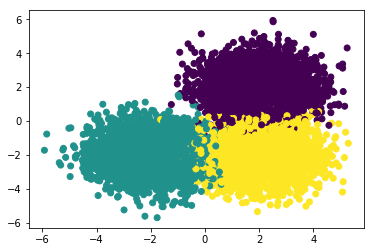

(10000, 2)
(10000,)
(1000, 2)
(9000, 2)


In [9]:
#original code

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)

# Configuration 1:

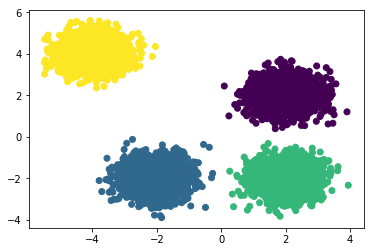

(10000, 2)
(10000,)
(1000, 2)
(1000,)


In [15]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers1 = [[2, 2], [-2, -2], [2, -2], [-4, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of .5.
X_one, y_one = make_blobs(
    n_samples=10000,
    centers=centers1,
    cluster_std=.5,
    n_features=2,
    random_state=49)

plt.scatter(X_one[:, 0], X_one[:, 1], c=y_one)
plt.show()

#Divide into training and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_one,
    y_one,
    test_size=0.9,
    random_state=66)

print(X_one.shape)
print(y_one.shape)
print(X_train1.shape)
print(y_train1.shape)

### Kmeans

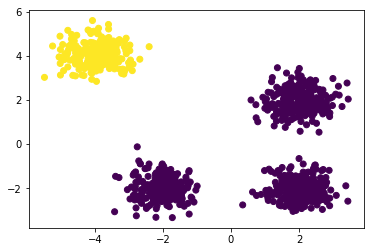

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      268  227  264    0
1        0    0    0  241


In [22]:
# Calculate predicted values.
y_pred1 = KMeans(n_clusters=2, random_state=56).fit_predict(X_train1)

# Plot the solution.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_pred1)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred1, y_train1))

Configuration 1 had four centers in the blob data.  So here when I ran Kmeans with 2 clusters, I didn't get as good of a result.

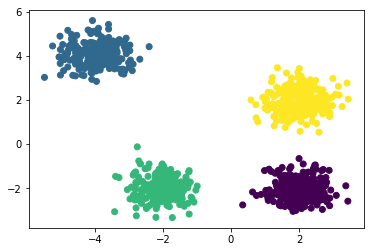

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        0    0  264    0
1        0    0    0  241
2        0  227    0    0
3      268    0    0    0


In [33]:
#second Kmeans attempt.
# Calculate predicted values.
y_pred1 = KMeans(n_clusters=4, random_state=56).fit_predict(X_train1)

# Plot the solution.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=y_pred1)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred1, y_train1))

As I increased the number of clusters for Kmeans from 2 to 4, while still using configuration 1, you can see from the cross tab results that the clusters in Kmeans performed better.  But having four clusters and four blobs of data, may lead to overfitting.

### Mean-shift

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train1)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


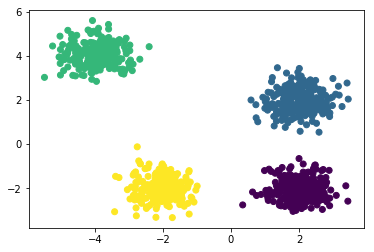

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3
row_0                
0      99  98  76  89
1      81  91  81  67
2      84  79  84  71


In [35]:
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

With mean-shift, the algorithm can decide how many clusters to use. With four clusters, 

### Spectral Clustering

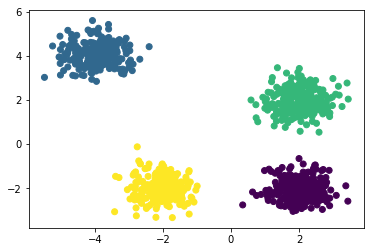

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    0  268    0
1        0    0    0  227
2      264    0    0    0
3        0  241    0    0


In [36]:
from sklearn.cluster import SpectralClustering

n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train1)

#Predicted clusters.
predict=sc.fit_predict(X_train1)

#Graph results.
plt.scatter(X_train1[:, 0], X_train1[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train1,predict))

Result from the spectral clustering was very similar to the result I got from Kmeans.  Because I had four blobs of data that were far from each other, I ran the spectral clustering model using four clusters, which gave a good result.  Each one of the four clusters was successful in grouping one of the four blobs of data.

### Affinity Propagation

In [37]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train1)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 235


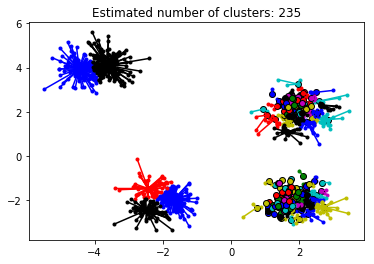

In [39]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.plot(X_train1[class_members, 0], X_train1[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train1[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Configuration 2:

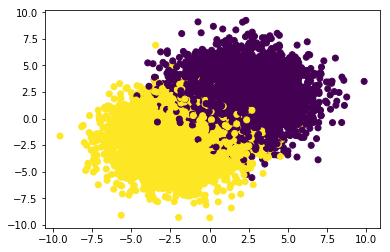

(1000, 2)
(9000, 2)


In [41]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers2 = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_two, y_two = make_blobs(
    n_samples=10000,
    centers=centers2,
    cluster_std=2,
    n_features=2,
    random_state=79)

plt.scatter(X_two[:, 0], X_two[:, 1], c=y_two)
plt.show()

#Divide into training and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two,
    y_two,
    test_size=0.9,
    random_state=89)

print(X_train2.shape)
print(X_test2.shape)

### Kmeans:

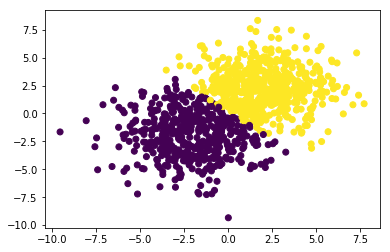

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       40  431
1      481   48


In [42]:
# Calculate predicted values.
y_pred2 = KMeans(n_clusters=2, random_state=56).fit_predict(X_train2)

# Plot the solution.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_pred2)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y_train2))

Kmeans did a horrible job; it misclassified 912 cases.  This could be due to the fact that the data is much closer together

### Mean Shift

In [47]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms_con2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_con2.fit(X_train2)

# Extract cluster assignments for each data point.
labels_con2 = ms_con2.labels_

# Coordinates of the cluster centers.
cluster_centers_con2 = ms_con2.cluster_centers_

# Count our clusters.
n_clusters_con2 = len(np.unique(labels_con2))

print("Number of estimated clusters: {}".format(n_clusters_con2))


Number of estimated clusters: 25


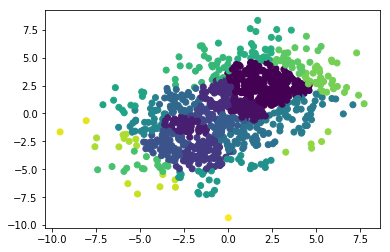

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  \
row_0                                          ...                           
0      219  44   0  42   1   4   1  12   6  12 ...  33  28   0  29  35   4   
1        7  17  53  22  83  21  64  27  35  36 ...   0   3  16   0   0   1   

col_0  21  22  23  24  
row_0                  
0       0   0   0   0  
1       9   6   2   1  

[2 rows x 25 columns]


In [48]:
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=labels_con2)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,labels_con2))

### Spectral Clustering

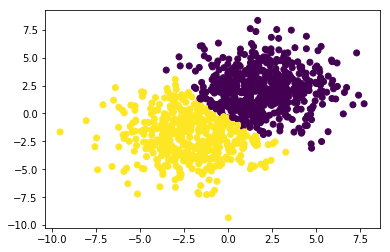

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      496   25
1       62  417


In [49]:
n_clusters=2

# Declare and fit the model.
sc_con2 = SpectralClustering(n_clusters=n_clusters)
sc_con2.fit(X_train2)

#Predicted clusters.
predict_con2=sc_con2.fit_predict(X_train2)

#Graph results.
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=predict_con2)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train2,predict_con2))

Spectral Clustering performed better than Kmeans, because as part of the process it applies PCA for dimension reduction and can handle non-flat geometry better than Kmeans.

### Affinity Propagation

In [50]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af_con2 = AffinityPropagation().fit(X_train2)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices_con2 = af_con2.cluster_centers_indices_
n_clusters_con2_af = len(cluster_centers_indices_con2)
labels_con2_af = af_con2.labels_

print('Estimated number of clusters: {}'.format(n_clusters_con2_af))

Done
Estimated number of clusters: 37


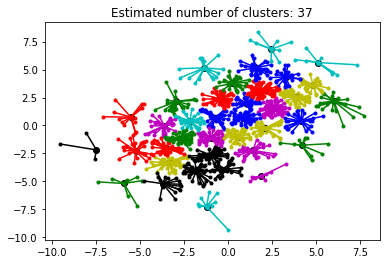

In [51]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_con2_af), colors):
    class_members = labels_con2_af == k
    cluster_center = X_train2[cluster_centers_indices_con2[k]]
    plt.plot(X_train2[class_members, 0], X_train2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_con2_af))
plt.show()

# Configuration 3:

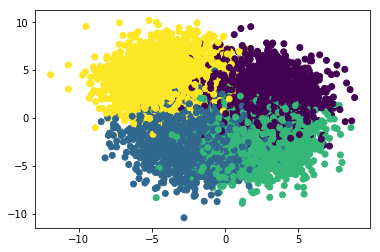

(1000, 2)
(9000, 2)


In [52]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers3 = [[2, 2], [-2, -2], [2, -2], [-4, 4]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_three, y_three = make_blobs(
    n_samples=10000,
    centers=centers3,
    cluster_std=2,
    n_features=2,
    random_state=99)

plt.scatter(X_three[:, 0], X_three[:, 1], c=y_three)
plt.show()

#Divide into training and test sets.
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_three,
    y_three,
    test_size=0.9,
    random_state=109)

print(X_train3.shape)
print(X_test3.shape)

### Kmeans

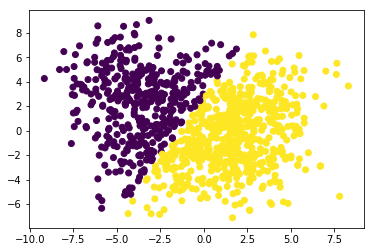

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0       30  119    4  255
1      230  123  234    5


In [58]:
# Calculate predicted values.
y_pred3 = KMeans(n_clusters=2, random_state=56).fit_predict(X_train3)

# Plot the solution.
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=y_pred3)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y_train3))

With four blobs of data, Kmeans did not perform well with only 2 clusters.  Increasing the number of clusters to match the different blobs of data would make the classification better.